# Testnotebook

Hier probiere ich Ideen und Techniken aus.

In [1]:
import sys
sys.path.append("../src/") 
from quiz import start_quiz
from utils import css_styling, hide_code
from functionplotter import plt_function
css_styling()

In [2]:
plt_function(function="linear", space=(-10.0, 10), slider_step=1.0)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='m', max=10.0, min=-10.0, re…

<label for="show" id="show_answer">
    <span>Antwort zeigen</span>
</label>
<input type=radio id="show" name="group">
   
<input type=radio id="hide" name="group">
<span id="content">Hier kommt die Antwort<br><br>
<label for="hide" id="hide_answer">
    <span>Antwort verbergen</span> 
</label> 
</span>

In [1]:
%matplotlib inline
plt_function(function="constant")

NameError: name 'plt_function' is not defined

In [2]:
a = 4
def b(x):
    return x**2
c = b(a)
hide_code()

NameError: name 'hide_code' is not defined

<div class=warn>
    <b>Achtung</b>: Dies ist ein Achtung-Feld.
    <br>
    <br>
</div>

<div class=task>
    <b>Aufgabe</b>: Dies ist ein Aufgaben-Feld.
    <br>
    <br>
</div>

<div class=digression>
    <b>Exkurs</b>: Dies ist ein Exkurs-Feld.
    <br>
    <br>
</div>

<div class=note>
    <b>Hinweis</b> : Dies ist ein Hinweis-Feld.
    <br>
    <br>
</div>

## testing interactive graph visualization

In [1]:
import jp_proxy_widget

from IPython.html.widgets import *
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import MaxNLocator


def coordinate_system(ax, neg_dim, pos_dim):

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim([neg_dim,pos_dim])
    ax.set_ylim([neg_dim,pos_dim])
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

/home/janpaulus/.local/share/virtualenvs/madh-JU2eo5wt/lib/python3.8/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [41]:
@np.vectorize
def constant_function(c, x):
    return c

def get_function(function = "constant", space=(-10.0, 10.0), **kwargs):
    if function == "constant" and len(kwargs) > 0:
        x = np.linspace(space[0],space[1],num=100)
        
        y = constant_function(kwargs["v1"], x)
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        coordinate_system(ax, space[0],space[1]) 
        plt.plot(x, y)
        plt.grid()
        plt.show()
        
def get_slider(value_names = ["x", "w"], 
               space = (-10.0, 10.0), 
               slider_step = 1.0):
    
    if len(value_names) == 1:
        sliders = [widgets.FloatSlider(value=0, 
                                       min=space[0], 
                                       max=space[1],
                                       step=slider_step,
                                       description=f'{value_names[0]}',
                                       disabled=False,
                                       continuous_update=False,
                                       orientation='horizontal',
                                       readout=True,
                                       readout_format='.1f',) 
                   for i in range(len(value_names))]
    else:
        sliders = [widgets.FloatSlider(value=0, 
                                       min=space[0], 
                                       max=space[1],
                                       step=slider_step,
                                       description=f'{value_names[i]}',
                                       disabled=False,
                                       continuous_update=False,
                                       orientation='horizontal',
                                       readout=True,
                                       readout_format='.1f',) 
                   for i in range(len(value_names))]
        
    return sliders
def plt_function(function = "constant", 
                 space=(-10.0, 10.0), 
                 slider_step = 1.0):
    if function == "constant":
        value_names = ["c", "x"]
        sliders = get_slider(value_names, space=space, slider_step=slider_step)
    
    kwargs = {'v{}'.format(i+1):slider for i, slider in enumerate(sliders)}
    interact(get_function, function=fixed(function), space=fixed(space), **kwargs)

In [42]:
plt_function(function="constant", space=(-20, 20, 1))

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='c', max=20.0, min=-20.0, re…

In [363]:
n_weights=10


In [354]:
kwargs.values()

dict_values([FloatSlider(value=0.0, continuous_update=False, description='w0', max=10.0, min=-10.0, readout_format='.1f'), FloatSlider(value=0.0, continuous_update=False, description='w1', max=10.0, min=-10.0, readout_format='.1f'), FloatSlider(value=0.0, continuous_update=False, description='w2', max=10.0, min=-10.0, readout_format='.1f'), FloatSlider(value=0.0, continuous_update=False, description='w3', max=10.0, min=-10.0, readout_format='.1f'), FloatSlider(value=0.0, continuous_update=False, description='w4', max=10.0, min=-10.0, readout_format='.1f'), FloatSlider(value=0.0, continuous_update=False, description='w5', max=10.0, min=-10.0, readout_format='.1f'), FloatSlider(value=0.0, continuous_update=False, description='w6', max=10.0, min=-10.0, readout_format='.1f'), FloatSlider(value=0.0, continuous_update=False, description='w7', max=10.0, min=-10.0, readout_format='.1f'), FloatSlider(value=0.0, continuous_update=False, description='w8', max=10.0, min=-10.0, readout_format='.1f'

In [263]:
a = (1, 2)
kwargs = {'v{}'.format(i) for i in a}

In [264]:
kwargs

{'v1', 'v2'}

In [261]:
def PlotSuperposition(**kwargs):
    def f(x):
        y = 0
        for i, weight in enumerate(kwargs.values()):
            if i==0:
                y+=weight
            else:
                y += weight*math.sin(x*i)
        return y
    vf = np.vectorize(f)
    xx = np.arange(0,6,0.1)
    plt.plot(xx, vf(xx))
    plt.gca().set_ylim(-5,5)
    
    
n_weights=2
weight_sliders = [widgets.FloatSlider(
        value=0,
        min=-10.0,
        max=10.0,
        step=0.1,
        description='w%d' % i,
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
    ) for i in range(n_weights)]


kwargs = {'w{}'.format(i):slider for i, slider in enumerate(weight_sliders)}
print(kwargs)

interact(PlotSuperposition, **kwargs)

{'w0': FloatSlider(value=0.0, continuous_update=False, description='w0', max=10.0, min=-10.0, readout_format='.1f'), 'w1': FloatSlider(value=0.0, continuous_update=False, description='w1', max=10.0, min=-10.0, readout_format='.1f')}


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='w0', max=10.0, min=-10.0, r…

<function __main__.PlotSuperposition(**kwargs)>

In [235]:
#
#%matplotlib inline

def linear_function(w,x,b):
    return w*x + b





def constant_function(c):
    space=(-10, 10)
    x = np.linspace(space[0],space[1],num=100)
    y = c 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    coordinate_system(ax, space[0],space[1]) 
    plt.plot(x, y)
    plt.grid()
    plt.show()



In [236]:
plt_function()

AttributeError: 'vectorize' object has no attribute '__name__'

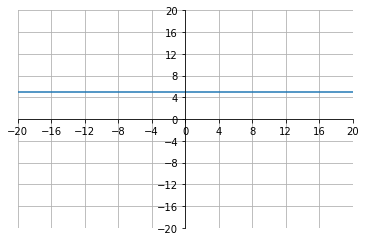

In [216]:
plt_function(5, function = "constant", space=(-20, 20))

https://stackoverflow.com/questions/33860207/ipython-jupyter-notebook-how-to-embed-interactive-graph-using-desmos-api